In [1]:
import numpy as np
import math

In [2]:
def F(x,y):
    return np.exp(1j*y)+2*np.exp(-1j*y/2)*np.cos(np.sqrt(3)/2*x)
def M(a):
    return np.array([[0,a],[np.conjugate(a),0]], dtype=complex)

In [3]:
n = 50 # size of gird
x, y = np.meshgrid(np.linspace(-np.pi,np.pi,n),np.linspace(-np.pi,np.pi,n))

z_eigval_1 = np.zeros((n,n))
z_eigval_2 = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        xx = x[i,j]
        yy = y[i,j]
        k1 = F(xx,yy)
        k2 = M(k1) # M value for each points
        z_eigval, _ = np.linalg.eig(k2) # Function to diagonalize
        z_eigval_1[i,j] += z_eigval[0]
        z_eigval_2[i,j] += z_eigval[1]

/tmp/ipykernel_6699/2117955933.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  z_eigval_1[i,j] += z_eigval[0]
/tmp/ipykernel_6699/2117955933.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  z_eigval_2[i,j] += z_eigval[1]


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

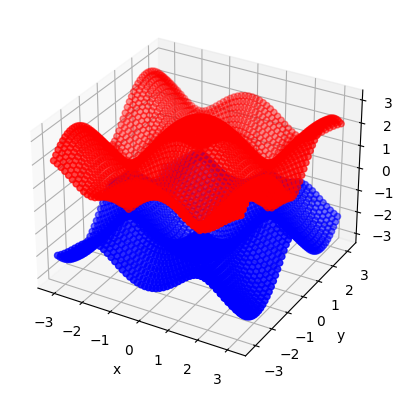

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z_eigval_1, c='r', marker='o')
ax.scatter(x, y, z_eigval_2, c='b', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Eigenvalues')
plt.show()

Text(0.5, 0.92, 'Eigenvalues_2')

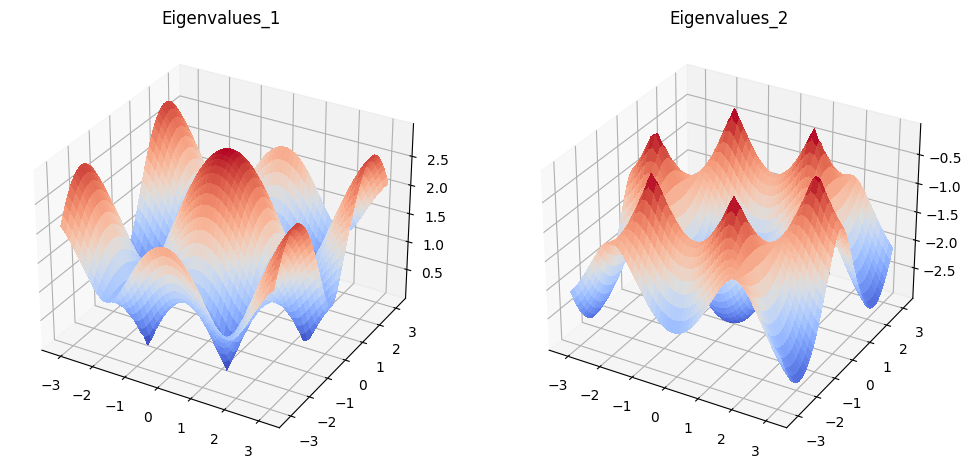

In [6]:
from matplotlib import cm

fig = plt.figure(figsize= (12,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.plot_surface(x,
                 y,
                 z_eigval_1,
                 cmap=cm.coolwarm, 
                 linewidth=0, 
                 antialiased=False,
                )
ax1.set_title('Eigenvalues_1')

ax2.plot_surface(x,
                 y,
                 z_eigval_2,
                 cmap=cm.coolwarm, 
                 linewidth=0, 
                 antialiased=False,
                )
ax2.set_title('Eigenvalues_2')